# Homework 1 (Support Vector Machines)

Using the data [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/hw1.csv), build the models as described below that use all the `X` variables (`X1`, `X2`... `X8`) to predict `Group`. Make sure that data is **z score appropriately**. Due to the number of models you're fitting with GridSearch, this make take a while to run.

- A. 💻 Load your data and do a 80/20 Train Test Split
- B. 💻 Use sklearn Pipelines to build an SVM model. Use `GridSearchCV` to choose the `kernel` (choose from `linear` and `rbf`), `C` (choose from `[0.001, 0.01, 1, 5, 25, 50]`), and `gamma` (choose from `[0.001,0.01, 0.1, 0.5, 1,2,5]`). Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.
- C. 💻 Use sklearn Pipelines to build a Logistic Regression on the same data with the same train/test set. Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices. ([CPSC 392 code](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/tree/master/Classwork)
- D. 💻 Use sklearn Pipelines to build a KNearest Neighbors model on the same data with the same train/test set (use GridSearch to choose `n_neighbors`).Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.   ([CPSC 392 code](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/tree/master/Classwork))


# What to Turn In

- PDF of your technical report (rendered through Quarto)
- your code as a .py, .ipynb, or link to github (you must turn it in either as a file, or a link to something that has timestamps of when the file was last edited)
- a README file as a .txt or .md

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data and plotting
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline # Pipeline
from sklearn.compose import make_column_transformer # Pipeline usage / MCT

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_auc_score

# models!
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# A: Reading in data, TTS

data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/hw1.csv")

pred = data.filter(regex = "X").columns
X = data[pred]
y = data['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 123)

In [3]:
data.head()
print(data.isnull().sum())
data.corr()

X1       0
X2       0
X3       0
X4       0
X5       0
X6       0
X7       0
X8       0
Group    0
dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8
X1,1.000000,-0.162925,0.053404,0.048797,0.064429,-0.030689,-0.271790,-0.004266
X2,-0.162925,1.000000,0.063820,0.176044,0.037858,-0.059990,0.178142,-0.020490
X3,0.053404,0.063820,1.000000,-0.007330,0.028529,-0.074335,-0.107514,-0.013038
X4,0.048797,0.176044,-0.007330,1.000000,0.160035,0.028746,0.026834,0.083458
X5,0.064429,0.037858,0.028529,0.160035,1.000000,-0.054253,0.022389,-0.073225
X6,-0.030689,-0.059990,-0.074335,0.028746,-0.054253,1.000000,-0.129064,0.021826
X7,-0.271790,0.178142,-0.107514,0.026834,0.022389,-0.129064,1.000000,-0.016308
X8,-0.004266,-0.020490,-0.013038,0.083458,-0.073225,0.021826,-0.016308,1.000000


Best Kernel:  rbf
Best C:  25
Best gamma:  0.01
Train Accuracy: 0.78
Test Accuracy: 0.78
Train ROC/AUC: 0.8524048582995951
Test ROC/AUC: 0.8511458333333333


<Figure size 500x500 with 0 Axes>

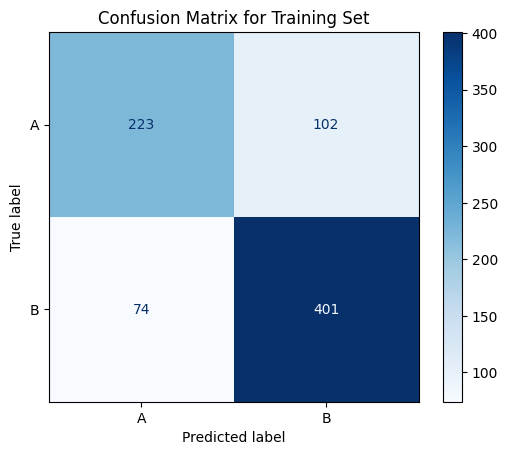

<Figure size 500x500 with 0 Axes>

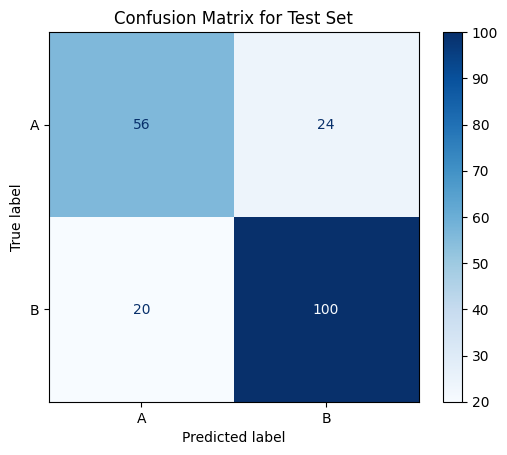

In [11]:
# B: Use sklearn Pipelines to build an SVM model.
# Use GridSearchCV to choose the kernel (choose from linear and rbf),
# C (choose from [0.001, 0.01, 1, 5, 25, 50]), and gamma (choose from [0.001,0.01, 0.1, 0.5, 1,2,5]).
# Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.

# Make column transformer to z-score
pre = make_column_transformer((StandardScaler(), pred),
                              remainder = 'passthrough')

# Basic SVM model
SVM = SVC(probability = True)

# Pipeline!
pipeSVM = Pipeline([ #List of steps to perform to take raw data -> predcition
    ('pre', pre), # Name of the preprocessing step
    ('model', SVM) #Name of the model
])

# GridSearch to choose kernel, C, and Gamma
parameters = {'model__kernel':('linear', 'rbf'),
              'model__C':[0.001, 0.01, 1, 5, 25, 50],
              'model__gamma':[0.001,0.01, 0.1, 0.5, 1,2,5]}

grid = GridSearchCV(pipeSVM, parameters, scoring = 'accuracy', refit = True,cv = 5, verbose=0)
grid.fit(X_train, y_train)

print("Best Kernel: ", grid.best_estimator_.get_params()["model__kernel"])
print("Best C: ", grid.best_estimator_.get_params()["model__C"])
print("Best gamma: ", grid.best_estimator_.get_params()["model__gamma"])

# predict!!
y_pred_train = grid.best_estimator_.predict(X_train)
y_pred_test = grid.best_estimator_.predict(X_test)

y_pred_train_prob = grid.best_estimator_.predict_proba(X_train)[:,1]
y_pred_test_prob = grid.best_estimator_.predict_proba(X_test)[:,1]

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("Train ROC/AUC:", roc_auc_score(y_train, y_pred_train_prob))
print("Test ROC/AUC:", roc_auc_score(y_test, y_pred_test_prob))

# Confusion Matrix for training set
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(grid, X_train, y_train, cmap=plt.cm.Blues, normalize=None)
plt.title('Confusion Matrix for Training Set')
plt.show()

# Confusion Matrix for the test set
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, cmap=plt.cm.Blues, normalize=None)
plt.title('Confusion Matrix for Test Set')
plt.show()

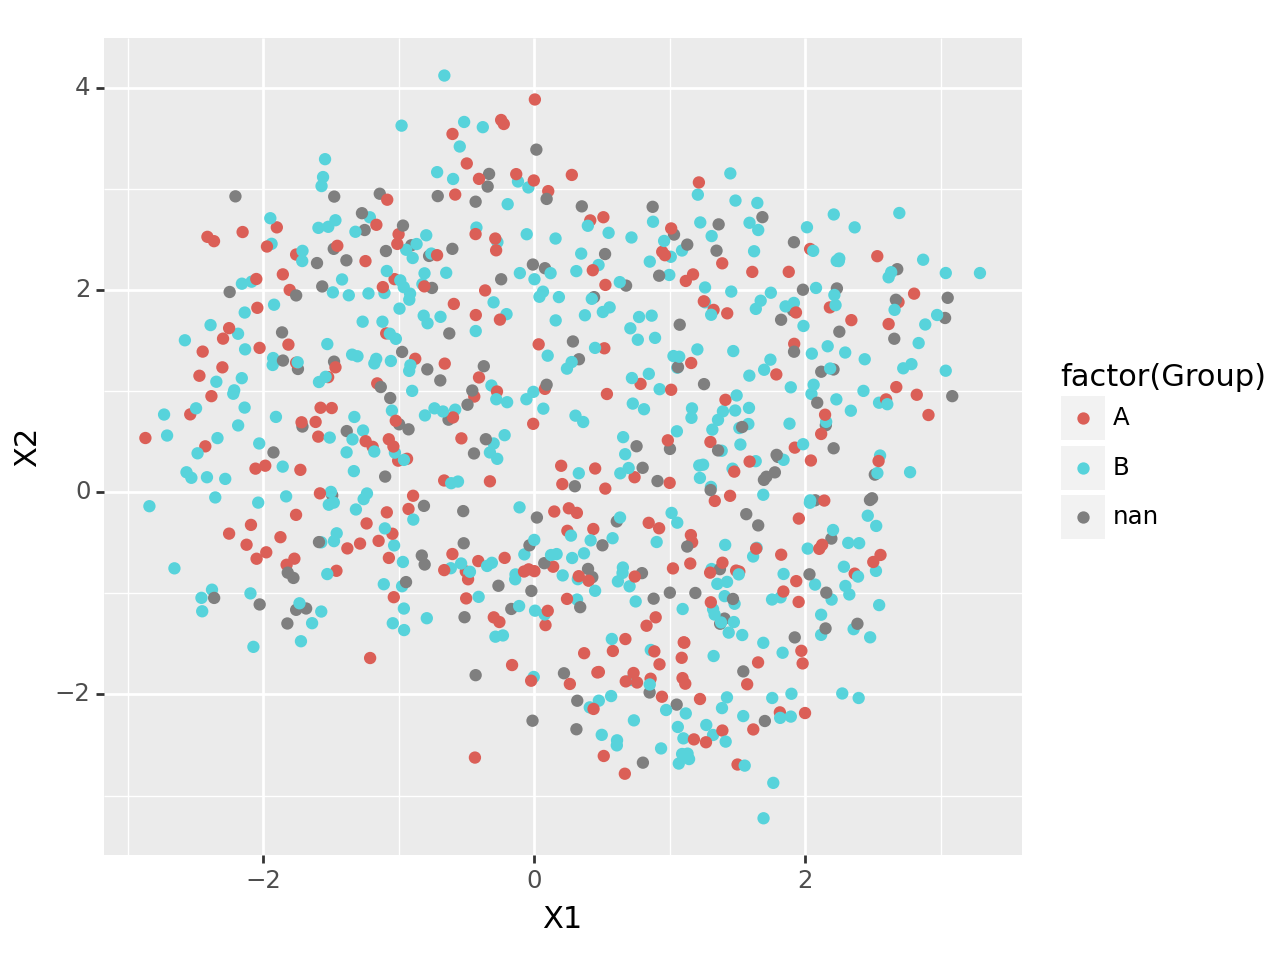

<Figure Size: (640 x 480)>

In [58]:
# Graphing the clusters as best as possible
# I went through all the variables to see if it gets any better than this. it does not
# Showing for visibility and data exploration!

y_pred_trainT = pd.DataFrame(y_pred_train, columns = ['Group'])

testing = pd.concat([X_train, y_pred_trainT], axis = 1)
(ggplot(testing, aes(x = testing['X1'], y = testing['X2'], color = 'factor(Group)')) + geom_point())


Train Accuracy: 0.76625
Test Accuracy: 0.78
Train ROC/AUC: 0.8524372469635628
Test ROC/AUC: 0.85125


<Figure size 700x700 with 0 Axes>

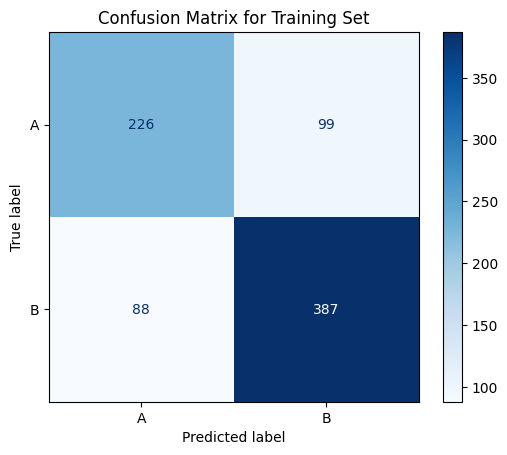

<Figure size 700x700 with 0 Axes>

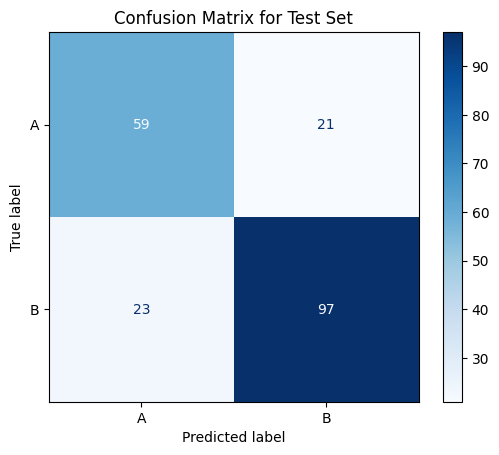

In [7]:
# C : Use sklearn Pipelines to build a Logistic Regression on the same data with
# the same train/test set. Print out the train and test accuracies and ROC/AUCs,
# and plot the train and test confusion matrices.

# Make column transformer to z-score
pre = make_column_transformer((StandardScaler(), pred),
                              remainder = 'passthrough')

# Basic LR model
lr = LogisticRegression()

# Pipeline!
pipe = Pipeline([ #List of steps to perform to take raw data -> predcition
    ('pre', pre), # Name of the preprocessing step
    ('logisticregression', lr) #Name of the model
])

pipe.fit(X_train, y_train)
# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("Train ROC/AUC:", roc_auc_score(y_train, y_pred_train_prob))
print("Test ROC/AUC:", roc_auc_score(y_test, y_pred_test_prob))

# Plot for the training set
plt.figure(figsize=(7, 7))
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train, cmap=plt.cm.Blues, normalize=None)
plt.title('Confusion Matrix for Training Set')
plt.show()

# Plot for the test set
plt.figure(figsize=(7, 7))
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap=plt.cm.Blues, normalize=None)
plt.title('Confusion Matrix for Test Set')
plt.show()

GridSearchCV chose:  1
Train Acc       :  1.0
Test Acc        :  0.695
Train ROC AUC   :  1.0
Test ROC AUC    :  0.6791666666666667


<Figure size 700x700 with 0 Axes>

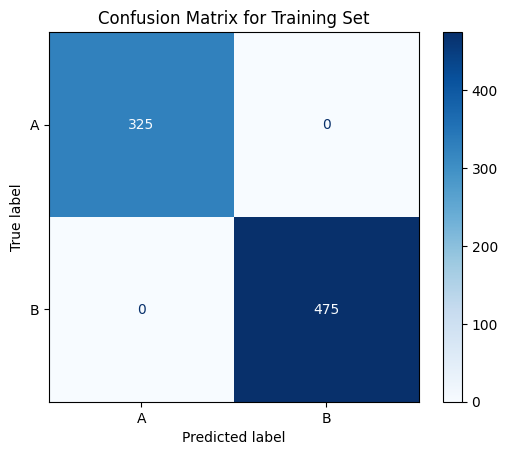

<Figure size 700x700 with 0 Axes>

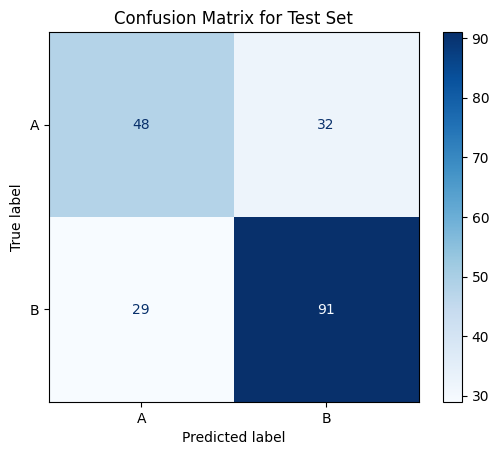

In [8]:
# D : Use sklearn Pipelines to build a KNearest Neighbors model
# on the same data with the same train/test set (use GridSearch to choose n_neighbors).
# Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.

# create model
knn = KNeighborsClassifier()

# create z score object
z = make_column_transformer((StandardScaler(), pred),
                            remainder = "passthrough")

# make pipeline
pipe = Pipeline([("pre", z), ("model", knn)])

# choose potential values of k
ks = {"model__n_neighbors": [1,2,5,10,20]}

# use grid search to find best parameters
grid = GridSearchCV(pipe, ks, scoring = "precision", cv = 5, refit = True)

grid.fit(X_train, y_train)

print("GridSearchCV chose: ", grid.best_estimator_.get_params()["model__n_neighbors"])

# predict
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

y_pred_train_prob = grid.predict_proba(X_train)[:,1]
y_pred_test_prob = grid.predict_proba(X_test)[:,1]

# assess
print("Train Acc       : ", accuracy_score(y_train, y_pred_train))
print("Test Acc        : ", accuracy_score(y_test, y_pred_test))

print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob))

# Plot for the training set
plt.figure(figsize=(7, 7))
ConfusionMatrixDisplay.from_estimator(grid, X_train, y_train, cmap=plt.cm.Blues, normalize=None)
plt.title('Confusion Matrix for Training Set')
plt.show()

# Plot for the test set
plt.figure(figsize=(7, 7))
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, cmap=plt.cm.Blues, normalize=None)
plt.title('Confusion Matrix for Test Set')
plt.show()
